# Plotting 3 sweep results

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as sps

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from math import log10, floor
def round_sig(x, sig=3):
    return round(x, sig-int(floor(log10(abs(x))))-1)

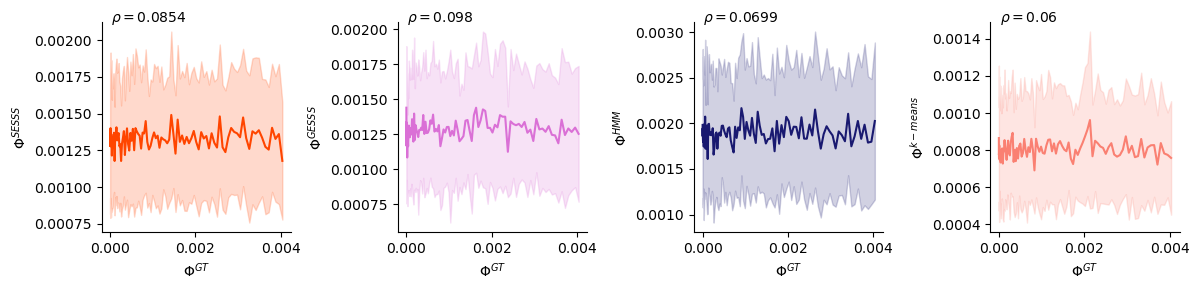

In [7]:
HMM = np.array(pd.read_csv('EPR_HMM_JSD.csv'))
kmeans = np.array(pd.read_csv('EPRkmeansJSD.csv'))
sess = np.array(pd.read_csv('EPR_SESSS_JSD.csv'))
gess = np.array(pd.read_csv('EPR_GESSS_JSD.csv'))

EPR_true = np.array(pd.read_csv('EPR_true.csv',header=None)[0])[1:]

fig, axs = plt.subplots(1,4)
fig.set_size_inches(12,3)

res = [sess,gess,HMM,kmeans]
col =['orangered','orchid','midnightblue','salmon']
labels =[r'$\Phi^{SESSS}$',r'$\Phi^{GESSS}$',r'$\Phi^{HMM}$',r'$\Phi^{k-means}$']
for i in range(0,4):
    axs[i].plot(EPR_true,np.mean(res[i],0),color=col[i])
    stdup = np.mean(res[i],0)+ np.std(res[i],0)
    stddown = np.mean(res[i],0)- np.std(res[i],0)
    axs[i].fill_between(EPR_true, stddown, stdup, color=col[i], alpha=0.2)
    axs[i].set_xlabel(r'$\Phi^{GT}$')
    axs[i].set_ylabel(labels[i])
    rho = sps.pearsonr(EPR_true,np.mean(res[i],0))
    axs[i].text(.05, 1, r'$\rho = $'+ str(round_sig(rho.statistic)), transform=axs[i].transAxes)


sns.despine()
plt.tight_layout()
plt.show()